In [1]:
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from thesis_tools.utils.data import *

# Test self-made lib

In [3]:
from thesis_tools.models.bayesian_multivariate_cross_sectional import *

In [4]:
df = read_billionaires_data(only_years=['2018'])

In [5]:
model = Multivariate_Weibull(data=df, group_variable='region')

In [6]:
model.fit()

## Check prior predictive

In [7]:
prior = model.prior_predictive()
pd.DataFrame(prior)

Sampling: [alpha_pymc, beta_pymc, y]


,gamma,alpha,y
Central Eurasia,"[0.227816161886033, 0.25457349689356146, 0.480...","[4.97622432006114, 4.56850389572399, 2.0791917...","[11.586006629489836, 312.53250104768483, 21.48..."
China,"[0.15406278817149657, 0.09556404026049696, 0.4...","[6.547275569118305, 11.292733247652198, 2.2653...","[16.717145868621504, 1.238533015340073, 343.33..."
East Asia,"[0.07663849822331628, 0.8168698003452857, 0.13...","[12.80619960960327, 1.7222363568133336, 8.2906...","[21.37298586954105, 142.44506937629527, 2.5148..."
Europe,"[0.23083599415827458, 0.03047570750458135, 0.2...","[4.292018320941235, 32.933149785601174, 3.8933...","[12.756526014899183, 4.9545368486103945, 7.287..."
India,"[0.5200228826340887, 0.031144742452143038, 0.0...","[2.1933570354617937, 32.23073969105578, 15.564...","[165755.52492941043, 1.4673011150598423, 6.450..."
Middle East,"[0.5773447780204145, 0.07206585721286446, 0.38...","[2.2820722058997323, 13.960699136562894, 2.479...","[25.19309332766714, 890.5835305585018, 93.9215..."
North America,"[0.08209787569092158, 0.1666538371737775, 0.15...","[11.605897104004013, 6.166263668418187, 6.3713...","[1920.3185215940352, 1.265678601056633, 10.962..."
Rest of World,"[0.02424094492211074, 0.6843739016021312, 0.02...","[41.615541596450605, 1.963174272173256, 42.018...","[6954.216511178254, 192.9117404029054, 1.35428..."
South America,"[0.13396154582585748, 0.40147404348174526, 0.3...","[7.583020174276633, 3.0691816924259543, 2.3083...","[5.6205777209061605, 57.2727634678142, 2.50656..."


In [8]:
prior_summary = model.get_prior_summary()

Sampling: [alpha_pymc, beta_pymc, y]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


In [9]:
prior_summary.get_group('gamma_obs')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prefix
group,,,,,,,,,,
Central Eurasia,0.30,0.25,0.01,0.75,0.01,0.01,442.28,335.77,NaN,gamma_obs
China,0.29,0.22,0.00,0.67,0.01,0.01,467.67,347.62,NaN,gamma_obs
East Asia,0.28,0.21,0.01,0.65,0.01,0.01,353.27,382.51,NaN,gamma_obs
Europe,0.26,0.20,0.00,0.64,0.01,0.01,450.42,369.18,NaN,gamma_obs
India,0.30,0.22,0.01,0.70,0.01,0.01,508.94,473.99,NaN,gamma_obs
Middle East,0.31,0.24,0.01,0.76,0.01,0.01,577.17,515.11,NaN,gamma_obs
North America,0.28,0.20,0.01,0.64,0.01,0.01,494.38,473.41,NaN,gamma_obs
Rest of World,0.28,0.21,0.01,0.68,0.01,0.01,595.28,473.99,NaN,gamma_obs
South America,0.28,0.23,0.01,0.69,0.01,0.01,488.54,397.56,NaN,gamma_obs


In [10]:
prior_summary.get_group('alpha_obs')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prefix
group,,,,,,,,,,
Central Eurasia,8.95,28.71,0.53,24.78,1.30,0.92,456.68,335.74,NaN,alpha_obs
China,8.43,17.49,0.35,20.17,0.86,0.61,441.22,347.62,NaN,alpha_obs
East Asia,8.20,13.01,0.74,24.24,0.65,0.50,354.27,463.07,NaN,alpha_obs
Europe,9.05,14.86,0.84,27.76,0.73,0.52,461.07,390.45,NaN,alpha_obs
India,7.79,14.31,0.77,20.81,0.62,0.45,569.81,499.93,NaN,alpha_obs
Middle East,7.34,11.17,0.74,19.25,0.50,0.35,550.01,496.53,NaN,alpha_obs
North America,8.20,12.90,0.74,21.96,0.56,0.40,489.47,514.39,NaN,alpha_obs
Rest of World,7.82,9.92,1.00,22.22,0.43,0.31,571.78,473.99,NaN,alpha_obs
South America,9.52,21.01,0.71,26.51,0.94,0.67,496.72,399.49,NaN,alpha_obs


## Check posterior predictive

In [11]:
posterior = model.posterior_predictive(n_dependent_samples=1000)
posterior_df = pd.DataFrame(posterior)
posterior_df

,gamma,alpha,y
Central Eurasia,"[0.4427521863673812, 0.5777330617411325, 0.509...","[1.8767943891613084, 1.961938180768219, 1.7852...","[1.9235639465944425, 2.0971673839221494, 2.257..."
China,"[0.5185315917909858, 0.48433595466802254, 0.56...","[1.3824252368226009, 1.3307641134420787, 1.466...","[1.1431393647309693, 1.2139091004521636, 1.745..."
East Asia,"[0.5939091949336204, 0.5361101385345671, 0.571...","[1.4801711796376724, 1.3334506802592705, 1.513...","[4.56206685761409, 2.1621314952051285, 2.22667..."
Europe,"[0.5492743853215079, 0.49858324014875127, 0.51...","[1.863143612948309, 1.742414879120465, 1.72110...","[3.092507313201269, 1.4790579419600238, 1.9674..."
India,"[0.5227098018467379, 0.5623702132258722, 0.566...","[1.7009668345410212, 1.7490913169553808, 1.818...","[3.524930834466453, 1.4317896398496754, 3.2469..."
Middle East,"[0.8165294370127714, 0.726429504286756, 0.7675...","[1.2542494228861456, 1.2100669757513127, 0.905...","[1.517784189011245, 1.7496377355167134, 2.8069..."
North America,"[0.47529809664083783, 0.43609864315333197, 0.4...","[1.7463873035715949, 1.7998944086618713, 1.860...","[3.3174367343221087, 2.1316310951282857, 1.223..."
Rest of World,"[0.8391096280935102, 0.49981025884649755, 0.68...","[1.7616530396346568, 1.6095930045131157, 1.952...","[2.838175863615291, 1.046409812115218, 2.53242..."
South America,"[0.516505519265486, 0.5151264643608705, 0.5946...","[1.8631844656868157, 1.8654293859987352, 1.958...","[1.1783818036438325, 4.819695723634023, 3.6996..."


In [12]:
# append a new column that is the mean of the list stored in the 'y' column
posterior_df['y_mean'] = posterior_df['y'].apply(lambda x: np.mean(x))

In [13]:
posterior_df

,gamma,alpha,y,y_mean
Central Eurasia,"[0.4427521863673812, 0.5777330617411325, 0.509...","[1.8767943891613084, 1.961938180768219, 1.7852...","[1.9235639465944425, 2.0971673839221494, 2.257...",3.949306
China,"[0.5185315917909858, 0.48433595466802254, 0.56...","[1.3824252368226009, 1.3307641134420787, 1.466...","[1.1431393647309693, 1.2139091004521636, 1.745...",3.337403
East Asia,"[0.5939091949336204, 0.5361101385345671, 0.571...","[1.4801711796376724, 1.3334506802592705, 1.513...","[4.56206685761409, 2.1621314952051285, 2.22667...",3.293368
Europe,"[0.5492743853215079, 0.49858324014875127, 0.51...","[1.863143612948309, 1.742414879120465, 1.72110...","[3.092507313201269, 1.4790579419600238, 1.9674...",4.391364
India,"[0.5227098018467379, 0.5623702132258722, 0.566...","[1.7009668345410212, 1.7490913169553808, 1.818...","[3.524930834466453, 1.4317896398496754, 3.2469...",3.817388
Middle East,"[0.8165294370127714, 0.726429504286756, 0.7675...","[1.2542494228861456, 1.2100669757513127, 0.905...","[1.517784189011245, 1.7496377355167134, 2.8069...",2.387239
North America,"[0.47529809664083783, 0.43609864315333197, 0.4...","[1.7463873035715949, 1.7998944086618713, 1.860...","[3.3174367343221087, 2.1316310951282857, 1.223...",5.298364
Rest of World,"[0.8391096280935102, 0.49981025884649755, 0.68...","[1.7616530396346568, 1.6095930045131157, 1.952...","[2.838175863615291, 1.046409812115218, 2.53242...",4.319508
South America,"[0.516505519265486, 0.5151264643608705, 0.5946...","[1.8631844656868157, 1.8654293859987352, 1.958...","[1.1783818036438325, 4.819695723634023, 3.6996...",4.605576


In [14]:
posterior_summary = model.get_posterior_summary()

In [15]:
posterior_summary.groups

{'alpha_obs': ['Central Eurasia', 'China', 'East Asia', 'Europe', 'India', 'Middle East', 'North America', 'Rest of World', 'South America'], 'gamma_obs': ['Central Eurasia', 'China', 'East Asia', 'Europe', 'India', 'Middle East', 'North America', 'Rest of World', 'South America']}

In [16]:
posterior_summary.get_group('gamma_obs')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prefix
group,,,,,,,,,,
Central Eurasia,0.54,0.04,0.46,0.62,0.0,0.0,6223.85,2729.87,1.0,gamma_obs
China,0.52,0.02,0.48,0.56,0.0,0.0,5901.65,2959.72,1.0,gamma_obs
East Asia,0.57,0.04,0.51,0.63,0.0,0.0,6042.84,2695.36,1.0,gamma_obs
Europe,0.52,0.03,0.46,0.58,0.0,0.0,4395.32,2615.97,1.0,gamma_obs
India,0.57,0.05,0.48,0.67,0.0,0.0,5960.50,2799.91,1.0,gamma_obs
Middle East,0.82,0.09,0.65,0.99,0.0,0.0,6670.38,2816.77,1.0,gamma_obs
North America,0.47,0.02,0.42,0.50,0.0,0.0,5008.98,3066.79,1.0,gamma_obs
Rest of World,0.60,0.11,0.41,0.80,0.0,0.0,6153.04,3371.11,1.0,gamma_obs
South America,0.51,0.04,0.43,0.60,0.0,0.0,6132.77,3391.79,1.0,gamma_obs


In [17]:
posterior_summary.get_group('alpha_obs')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prefix
group,,,,,,,,,,
Central Eurasia,1.73,0.14,1.45,1.98,0.00,0.0,4408.23,2928.31,1.0,alpha_obs
China,1.36,0.06,1.25,1.48,0.00,0.0,4363.99,3184.49,1.0,alpha_obs
East Asia,1.45,0.09,1.29,1.61,0.00,0.0,4195.45,3188.87,1.0,alpha_obs
Europe,1.82,0.09,1.65,1.99,0.00,0.0,4799.05,3093.68,1.0,alpha_obs
India,1.70,0.14,1.45,1.97,0.00,0.0,4115.76,2770.83,1.0,alpha_obs
Middle East,1.18,0.12,0.97,1.42,0.00,0.0,4155.23,2504.90,1.0,alpha_obs
North America,1.87,0.08,1.73,2.01,0.00,0.0,4384.87,3685.00,1.0,alpha_obs
Rest of World,1.84,0.32,1.30,2.45,0.01,0.0,4082.15,2520.72,1.0,alpha_obs
South America,1.90,0.16,1.62,2.22,0.00,0.0,3969.38,3038.92,1.0,alpha_obs


## Check trace

In [18]:
trace = model.get_trace()

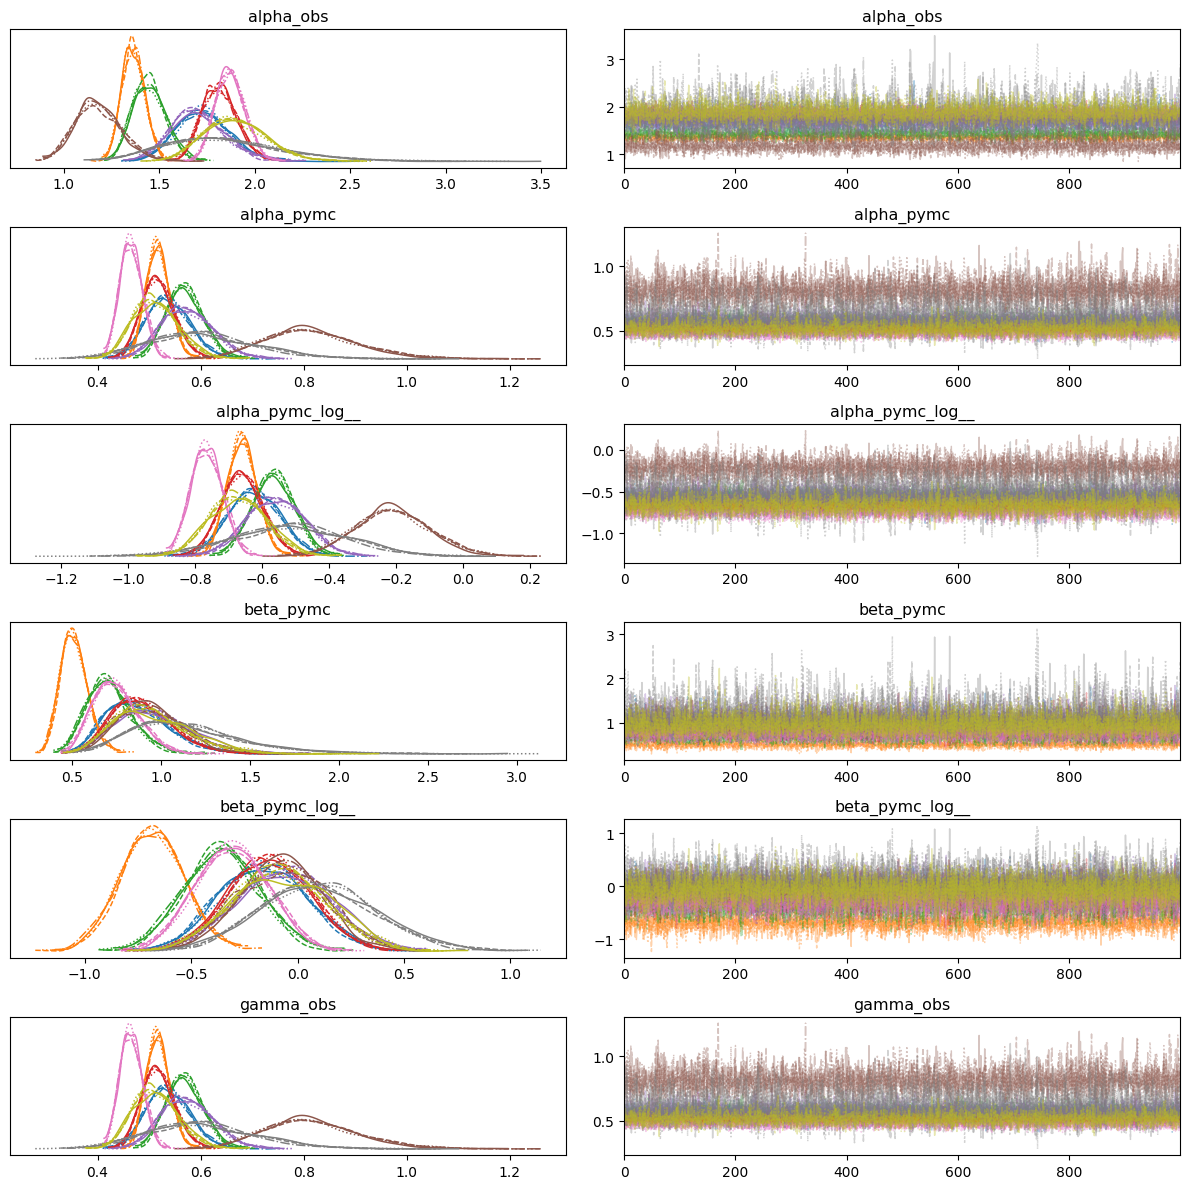

In [19]:
az.plot_trace(trace)
plt.tight_layout()